# Gunhoo Park
# USC ID: 8585425433
# Github ID: gunhoo

Homework #3

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

# 1. Time Seires Classification Part 1: Feature Creation /Extraction

An interesting task in machine learning is classification of time series. In this problem, we will classify the activities of humans based on time series obtained by a Wireless Sensor Network.

## (a) Download the AReM data

The dataset contains 7 folders that represent seven types of activities. In each folder, there are multiple files each of which represents an instant of a human performing an activity. Each file containis 6 time series collected from activities of the same person, which are called avg_rss12, var_rss12, avg_rss13, var_rss13, vg_rss23, and ar_rss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

In [7]:
# Source: https://archive.ics.uci.edu/dataset/366/activity+recognition+system+based+on+multisensor+data+fusion+arem
# F. Palumbo, C. Gallicchio, R. Pucci, and A. Micheli. "Activity Recognition system based on Multisensor data fusion (AReM)," UCI Machine Learning Repository, 2016. [Online]. Available: https://doi.org/10.24432/C5SS33.

## (b) Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [9]:
training_set = pd.DataFrame()
testing_set = pd.DataFrame()

In [10]:
for j in range(1, 3):
    for i in range(1, 7):
        file = f'../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/bending{j}/dataset{i}.csv'
        df = pd.read_csv(file, skiprows=4)
        df['activity'] = 'bending'+str(j)
        if i == 1 or i == 2:
            testing_set = pd.concat([testing_set, df])
        else:
            training_set = pd.concat([training_set, df])
file = f'../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/bending1/dataset7.csv'
df = pd.read_csv(file, skiprows=4)
df['activity'] = 'bending1'
training_set = pd.concat([training_set, df])

In [11]:
for j in ['cycling', 'lying', 'sitting', 'standing', 'walking']:
    for i in range(1, 16):
        file = f'../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/{j}/dataset{i}.csv'
        df = pd.read_csv(file, skiprows=4)
        df['activity'] = j
        if i == 1 or i == 2 or i == 3:
            testing_set = pd.concat([testing_set, df])
        else:
            training_set = pd.concat([training_set, df])

In [12]:
training_set = training_set.rename(columns={'# Columns: time': 'time'})
testing_set = testing_set.rename(columns={'# Columns: time': 'time'})

In [13]:
training_set

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity
0,0,42.00,0.71,21.25,0.43,30.00,0.00,bending1
1,250,41.50,0.50,20.25,1.48,31.25,1.09,bending1
2,500,41.50,0.50,14.25,1.92,33.00,0.00,bending1
3,750,40.75,0.83,15.75,0.43,33.00,0.00,bending1
4,1000,40.00,0.71,20.00,2.74,32.75,0.43,bending1
...,...,...,...,...,...,...,...,...
475,118750,34.50,6.18,9.00,3.56,12.67,4.19,walking
476,119000,25.75,6.02,13.75,2.05,16.00,1.58,walking
477,119250,31.50,3.35,10.25,5.12,16.25,2.95,walking
478,119500,33.75,2.77,14.00,3.24,13.75,0.43,walking


In [14]:
testing_set

,time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity
0,0,39.25,0.43,22.75,0.43,33.75,1.30,bending1
1,250,39.25,0.43,23.00,0.00,33.00,0.00,bending1
2,500,39.25,0.43,23.25,0.43,33.00,0.00,bending1
3,750,39.50,0.50,23.00,0.71,33.00,0.00,bending1
4,1000,39.50,0.50,24.00,0.00,33.00,0.00,bending1
...,...,...,...,...,...,...,...,...
475,118750,36.00,2.45,17.00,5.10,20.50,0.87,walking
476,119000,34.33,1.89,15.00,2.45,17.00,2.12,walking
477,119250,33.00,7.35,14.60,3.14,13.00,5.70,walking
478,119500,31.67,1.25,11.00,6.16,19.25,2.17,walking


## (c) Feature Extraction

Classification of time series usually needs extracting features from them. In this 
problem, we focus on time-domain features

### i. Research what types of time-domain features are usually used in time series classification and list them (examples are minimum, maximum, mean, etc.)

Reference:  
    - https://stats.stackexchange.com/questions/50807/features-for-time-series-classification  
    - http://erichorvitz.com/nips2012_CDiff_temporal.pdf?from=https://research.microsoft.com/en-us/um/people/horvitz/nips2012_CDiff_temporal.pdf&type=path  
    - https://jwcn-eurasipjournals.springeropen.com/articles/10.1186/s13638-020-1661-4

Means  
Standard deviations  
Skewness, Kurtosis, and Higher order moments  
max, min, length of time series, average, linear weighted average, quadratic weighted average  
d x d - 1 Cross-Correlations  
Orders of autoregressive(AR), integrated(I) and moving average(MA) part of estimated ARIMA model  
Parameters of the AR part, MA part

### ii. Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

Your new dataset will look like this:

| Instance | min | max | mean | median | ··· | 1st quart | 3rd quart |
|----------|-----|-----|------|--------|-----|-----------|-----------|
| 1        |     |     |      |        |     |           |           |
| 2        |     |     |      |        |     |           |           |
| 3        |     |     |      |        |     |           |           |
| ...      |     |     |      |        |     |           |           |
| ...      |     |     |      |        |     |           |           |
| 88       |     |     |      |        |     |           |           |

Where, for example, 1st quart6, means the first quartile of the sixth time series in each of the 88 instances.


In [22]:
def extract_features(df):
    features = {}
    columns = ['avg_rss12', 'var_rss12', 'avg_rss13', 'var_rss13', 'avg_rss23', 'var_rss23']
    
    for i, col in enumerate(columns, start=1):
        df_t = pd.DataFrame(df[col].astype('float').describe()).T
        features[f'min_{i}'] = df_t['min'].iloc[0]
        features[f'max_{i}'] = df_t['max'].iloc[0]
        features[f'mean_{i}'] = df_t['mean'].iloc[0]
        features[f'median_{i}'] = df_t['50%'].iloc[0]
        features[f'std_{i}'] = df_t['std'].iloc[0]
        features[f'1st_quartile_{i}'] = df_t['25%'].iloc[0]
        features[f'3rd_quartile_{i}'] = df_t['75%'].iloc[0]
    return features

In [23]:
extracted_features = []
for i in range(1, 8):
    file = f'../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/bending1/dataset{i}.csv'
    df = pd.read_csv(file, skiprows=4)
    df['activity'] = 'bending1'
    features = extract_features(df)
    features['activity'] = 'bending1'
    extracted_features.append(features)

for i in range(1, 7):
        file = f'../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/bending2/dataset{i}.csv'
        df = pd.read_csv(file, skiprows=4)
        df['activity'] = 'bending2'
        features = extract_features(df)
        features['activity'] = 'bending2'
        extracted_features.append(features)

for activity in ['cycling', 'lying', 'sitting', 'standing', 'walking']:
    for i in range(1, 16):
        file = f'../data/activity+recognition+system+based+on+multisensor+data+fusion+arem/{activity}/dataset{i}.csv'
        df = pd.read_csv(file, skiprows=4)
        df['activity'] = activity
        features = extract_features(df)
        features['activity'] = activity
        extracted_features.append(features)

In [24]:
features = pd.DataFrame(extracted_features)

In [25]:
features

,min_1,max_1,mean_1,median_1,std_1,1st_quartile_1,3rd_quartile_1,min_2,max_2,mean_2,...,1st_quartile_5,3rd_quartile_5,min_6,max_6,mean_6,median_6,std_6,1st_quartile_6,3rd_quartile_6,activity
0,37.25,45.00,40.624792,40.50,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,33.0000,36.00,0.00,1.92,0.570583,0.43,0.582915,0.0000,1.3000,bending1
1,38.00,45.67,42.812812,42.50,1.435550,42.00,43.6700,0.0,1.22,0.372437,...,32.0000,34.50,0.00,3.11,0.571083,0.43,0.601010,0.0000,1.3000,bending1
2,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,35.3625,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400,bending1
3,33.00,47.75,42.179812,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,30.4575,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000,bending1
4,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,28.4575,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000,bending1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,4.576562,...,13.7300,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225,walking
84,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,4.456333,...,13.5000,17.75,0.00,9.67,3.432563,3.20,1.732727,2.1575,4.5650,walking
85,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,4.371958,...,14.0000,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350,walking
86,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,4.380583,...,13.7500,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000,walking


In [26]:
features

,min_1,max_1,mean_1,median_1,std_1,1st_quartile_1,3rd_quartile_1,min_2,max_2,mean_2,...,1st_quartile_5,3rd_quartile_5,min_6,max_6,mean_6,median_6,std_6,1st_quartile_6,3rd_quartile_6,activity
0,37.25,45.00,40.624792,40.50,1.476967,39.25,42.0000,0.0,1.30,0.358604,...,33.0000,36.00,0.00,1.92,0.570583,0.43,0.582915,0.0000,1.3000,bending1
1,38.00,45.67,42.812812,42.50,1.435550,42.00,43.6700,0.0,1.22,0.372437,...,32.0000,34.50,0.00,3.11,0.571083,0.43,0.601010,0.0000,1.3000,bending1
2,35.00,47.40,43.954500,44.33,1.558835,43.00,45.0000,0.0,1.70,0.426250,...,35.3625,36.50,0.00,1.79,0.493292,0.43,0.513506,0.0000,0.9400,bending1
3,33.00,47.75,42.179812,43.50,3.670666,39.15,45.0000,0.0,3.00,0.696042,...,30.4575,36.33,0.00,2.18,0.613521,0.50,0.524317,0.0000,1.0000,bending1
4,33.00,45.75,41.678063,41.75,2.243490,41.33,42.7500,0.0,2.83,0.535979,...,28.4575,31.25,0.00,1.79,0.383292,0.43,0.389164,0.0000,0.5000,bending1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,19.50,45.33,33.586875,34.25,4.650935,30.25,37.0000,0.0,14.67,4.576562,...,13.7300,18.25,0.00,8.32,3.259729,3.11,1.640243,2.0500,4.3225,walking
84,19.75,45.50,34.322750,35.25,4.752477,31.00,38.0000,0.0,13.47,4.456333,...,13.5000,17.75,0.00,9.67,3.432563,3.20,1.732727,2.1575,4.5650,walking
85,19.50,46.00,34.546229,35.25,4.842294,31.25,37.8125,0.0,12.47,4.371958,...,14.0000,17.75,0.00,10.00,3.338125,3.08,1.656742,2.1600,4.3350,walking
86,23.50,46.25,34.873229,35.25,4.531720,31.75,38.2500,0.0,14.82,4.380583,...,13.7500,18.00,0.00,9.51,3.424646,3.27,1.690960,2.1700,4.5000,walking


the number of rows: 88 <br>
7,6,15,15,15,15,15 files in each directory<br><br>
the number of columns: 43<br>
each column has 7 features(min, max, mean, median, std, 1st_quartile, 3rd_quartile)<br>
x<br>
total columns 6 (avg_rss12, var_rss12, avg_rss13, var_rss13, avg_rss23, var_rss23)<br>
+<br>
1 (activity)<br>
=<br>
43 columns

### iii. Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [29]:
features_df = pd.DataFrame(extracted_features)
std_dev = features_df.drop(columns=['activity']).std()

In [30]:
std_dev

min_1             9.569975
max_1             4.394362
mean_1            5.335718
median_1          5.440054
std_1             1.772153
1st_quartile_1    6.153590
3rd_quartile_1    5.138925
min_2             0.000000
max_2             5.062729
mean_2            1.574164
median_2          1.412244
std_2             0.884105
1st_quartile_2    0.946386
3rd_quartile_2    2.125266
min_3             2.956462
max_3             4.875137
mean_3            4.008380
median_3          4.036396
std_3             0.946710
1st_quartile_3    4.220658
3rd_quartile_3    4.171628
min_4             0.000000
max_4             2.183625
mean_4            1.166114
median_4          1.145586
std_4             0.458242
1st_quartile_4    0.843620
3rd_quartile_4    1.552504
min_5             6.124001
max_5             5.741238
mean_5            5.675593
median_5          5.813782
std_5             1.024898
1st_quartile_5    6.096465
3rd_quartile_5    5.531720
min_6             0.045838
max_6             2.518921
m

In [31]:
# Source: https://docs.scipy.org/doc/scipy/reference/stats.html
# Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bootstrap.html
from scipy.stats import bootstrap

In [32]:
ci_results = []

In [33]:
for col in features_df.columns:
    if np.issubdtype(features_df[col].dtype, np.number):
        res = bootstrap((features_df[col].values,), np.std, confidence_level=0.90, method='basic')
        ci_results.append((col, res.confidence_interval.low, res.confidence_interval.high))

In [34]:
ci_df = pd.DataFrame(ci_results, columns=['Feature','Lower Bound', 'Upper Bound'])

In [35]:
ci_df

,Feature,Lower Bound,Upper Bound
0,min_1,8.290144,10.830072
1,max_1,3.485179,5.412987
2,mean_1,4.764851,5.915525
3,median_1,4.847996,6.051122
4,std_1,1.586359,1.962710
5,1st_quartile_1,5.627375,6.698117
6,3rd_quartile_1,4.412743,5.898480
7,min_2,0.000000,0.000000
8,max_2,4.696066,5.471849
9,mean_2,1.436513,1.746551


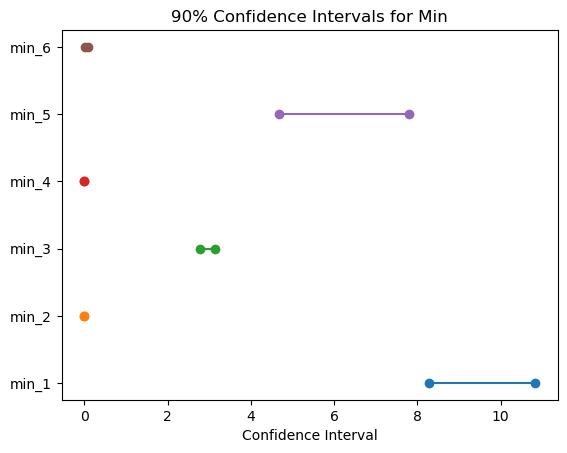

In [36]:
def plot_ci(feature_type):
    feature = ci_df[ci_df['Feature'].str.contains(feature_type)]
    for i, row in feature.iterrows():
        plt.plot([row['Lower Bound'], row['Upper Bound']],[row['Feature'], row['Feature']], marker='o')
    plt.yticks(np.arange(len(feature)), feature['Feature'])
    plt.xlabel('Confidence Interval')
    plt.title(f'90% Confidence Intervals for {feature_type.capitalize()}')
    plt.show()

# Min
plot_ci('min')

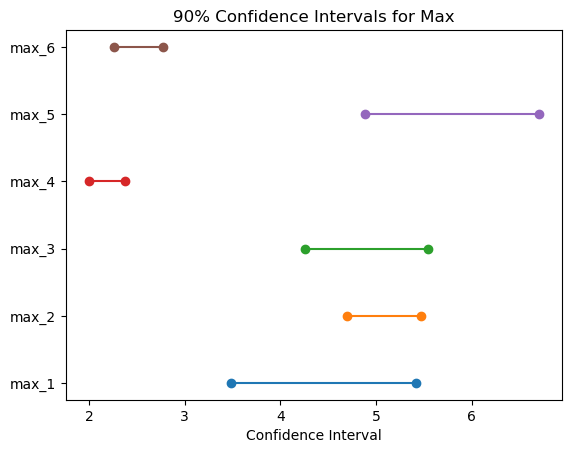

In [37]:
# Max
plot_ci('max')

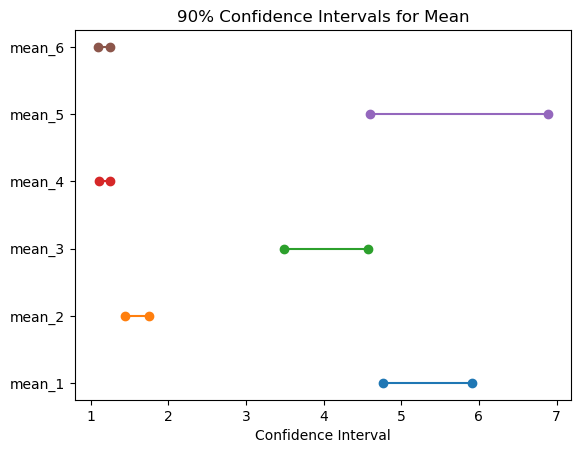

In [38]:
# Mean
plot_ci('mean')

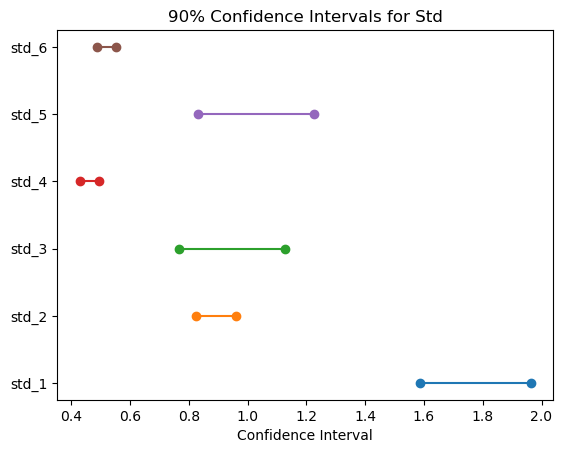

In [39]:
# Std
plot_ci('std')

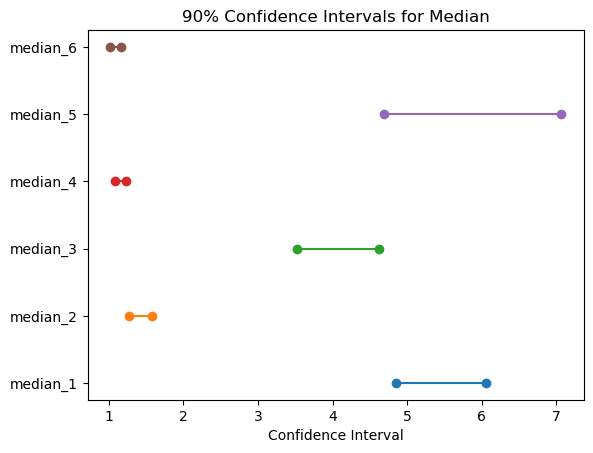

In [40]:
# Median
plot_ci('median')

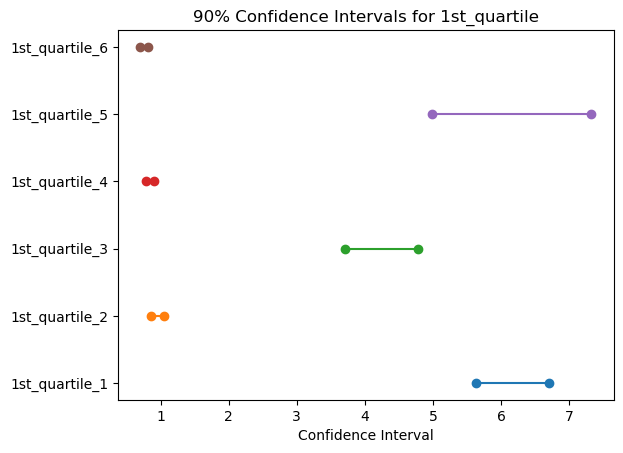

In [41]:
# 1st_quartile
plot_ci('1st_quartile')

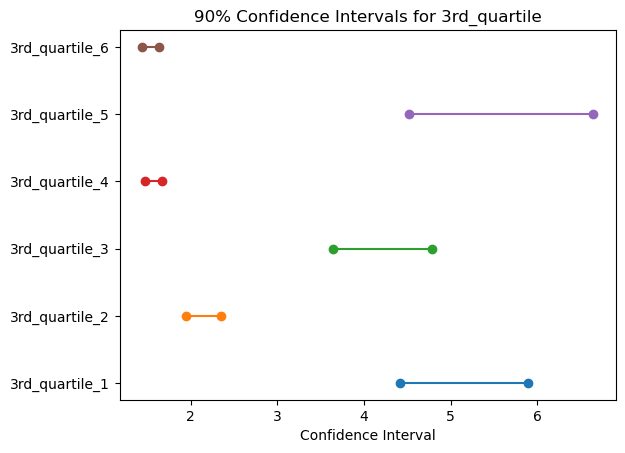

In [42]:
# 3rd_quartile
plot_ci('3rd_quartile')

### iv. Use your judgement to select the three most important time-domain features(one option may be min, mean, and max).

Wide range of confidence interval in time-domain means that it might have more variability which is more important feature. Therefore, I would like to select the min, max, and standard deviation. The standard deviation value can show how wide the values are around the central point. Also, with the maximum and minimum values, we can identify the outliers of the given data set.

# 2. ISLR 3.7.4

I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 + β1X + β2X^2 + β3X^3 + ϵ.

## (a) Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ϵ. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

We can expect that the training residual sum of squares(RSS) for the cubic regression will be lower than the training RSS for the linear regression when the true relationship between X and Y is lienar. This is because the cubic regression can be more flexible than the linear regression, which can allow overfitting. 

## (b) Answer (a) using test rather than training RSS.

When using testing data set, we can expect that the RSS for the linear regression will be lower than the cublic regression. This is because as mentioned in 2.(a), cubic regression allows overfitting, which may not perform well in the testing data set.

## (c) Suppose that the true relationshiop between X and Y is not linear, but we don't know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.

We can expect that the training RSS for the cublic regression would be lower than the training RSS for the linear regression given the true relationship between X and Y is not linear. This is because when X and Y is not linear, it needs more variables such as β2X^2, β3X^3, and so forth. This means that the cublic regression would present better than the linear regression.

## (d) Answer (c) using test rather than training RSS.

There is not enough information to tell the answer that (c) using test rather than trainig RSS. This is because we don't know the exact shape of testing data, we cannot expect that which one is better than the other. It can be more closer to the lienar, or it can be more closer to cubic. To answer (d), first we have to know what type of testing data is.